# What's Humanity's Center of Mass?

2020-05-07

Lucas Vieira wondered on Twitter (https://twitter.com/LucasVB/status/1258447895235366913) about the location of the center of mass of all humans on earth. Let's hack together a (very) rough estimate.

In [1]:
import geopandas
import matplotlib.pyplot as plt
import astropy
from astropy.coordinates.representation import SphericalRepresentation
from astropy.coordinates import Angle
from astropy import units as u
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# https://geopandas.org/mapping.html
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [3]:
# Get the centroid of each country's (multi)polygon. Warning: highly approximate
world['centroids_in_rad'] = world['geometry'].centroid.apply(lambda x: Angle(x, u.degree))

In [4]:
# For each country, get the unit vector that points from the center of the earth
# toward the country's centroid
world['unit_vectors'] = world['centroids_in_rad'].apply(lambda x: SphericalRepresentation(*x, distance=1))

In [5]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroids_in_rad,unit_vectors
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...","[163d51m11.3927s, -17d18m58.7139s]","(163.85316464, -17.31630943, 1.) (deg, deg, )"
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...","[34d45m10.7635s, -6d15m27.8367s]","(34.75298985, -6.25773243, 1.) (deg, deg, )"
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...","[-12d08m16.192s, 24d17m28.2227s]","(347.86216889, 24.29117296, 1.) (deg, deg, )"
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...","[-98d08m32.5729s, 61d28m08.6741s]","(261.85761863, 61.46907615, 1.) (deg, deg, )"
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...","[-112d35m57.9693s, 45d42m20.2608s]","(247.40056409, 45.705628, 1.) (deg, deg, )"


In [6]:
# Center of mass = weighted average of unit vectors, weighted by population
com = (world['unit_vectors'] * world['pop_est']).sum() / world['pop_est'].sum()

In [7]:
x, y, p = com.lon.deg, com.lat.deg, com.distance
print(f'Humanity\'s center of mass is roughly {6380*(1-p):.0f} ' 
      f'km below (lon, lat) = ({x:.5f}, {y:.5f}), or {p:.0%} of the distance from the planet\'s center.')

Humanity's center of mass is roughly 2363 km below (lon, lat) = (67.44437, 38.66074), or 63% of the distance from the planet's center.


In [8]:
# Set up log-scaled color scale
# https://matplotlib.org/tutorials/colors/colormapnorms.html
from matplotlib.colors import LogNorm
norm = LogNorm(vmin=world['pop_est'].min(), vmax=world['pop_est'].max())

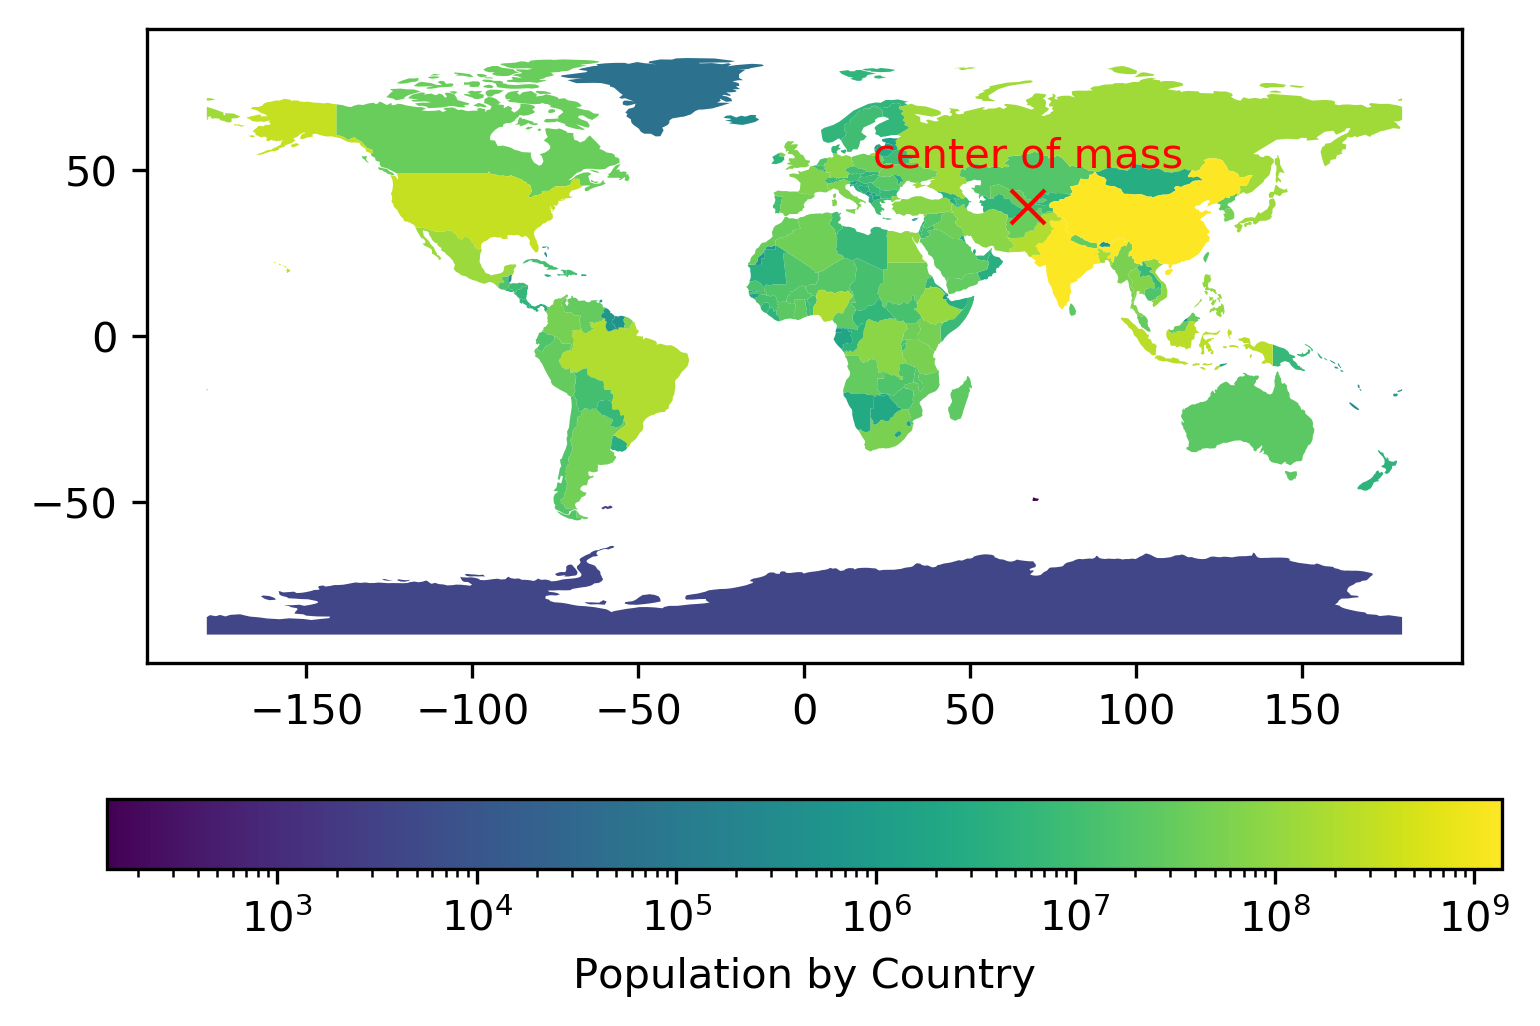

In [9]:
fig, ax = plt.subplots(dpi=150, facecolor='w')
world.plot(ax=ax, 
           column='pop_est', 
           legend=True, 
           norm=norm,
           legend_kwds={'label': 'Population by Country', 'orientation': 'horizontal'})
ax.plot(x, y, marker='x', markeredgewidth=1, markersize=8, c='r');
ax.text(x, y*1.25, 'center of mass', verticalalignment='bottom', horizontalalignment='center', c='r');